FinancialInstrument Class

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [97]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                              self.start,
                                                                              self.end)
        
    def get_data(self):
        raw_data = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw_data.rename({"Close": "price"}, axis='columns', inplace=True)
        self.data = raw_data
    
    def log_returns(self):
        self.data['log_returns'] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize=(12,8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize=(12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize=(12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
        
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def set_start(self, start = None):
        if start is not None:
            self.start = start
            self.get_data()
            self.log_returns()
            
    def set_end(self, end = None):
        if end is not None:
            self.end = end
            self.get_data()
            self.log_returns()

In [99]:
class RiskReturn(FinancialInstrument): # Child
    
    def __repr__(self): 
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                          self.start, self.end)
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [102]:
stock = RiskReturn("AAPL", "2015-01-01", "2021-11-16")

[*********************100%***********************]  1 of 1 completed


In [103]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2021-11-09,150.809998,0.002456
2021-11-10,147.919998,-0.019349
2021-11-11,147.869995,-0.000338


In [104]:
stock

RiskReturn(ticker = AAPL, start = 2015-01-01, end = 2021-11-16)

In [105]:
stock.ticker

AttributeError: 'RiskReturn' object has no attribute 'ticker'

In [106]:
stock._ticker

'AAPL'

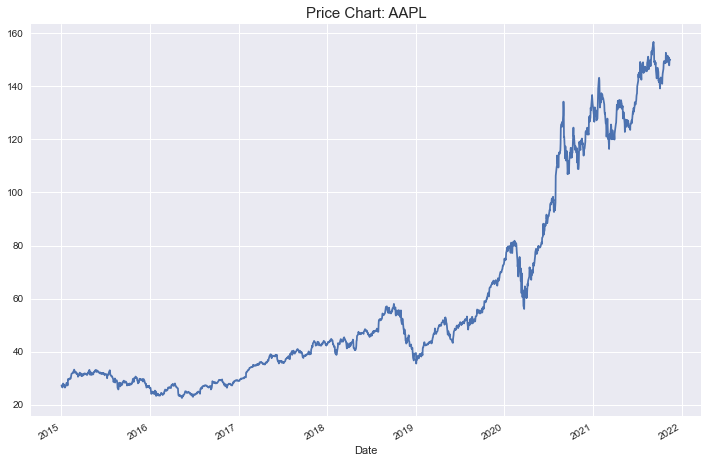

In [107]:
stock.plot_prices()

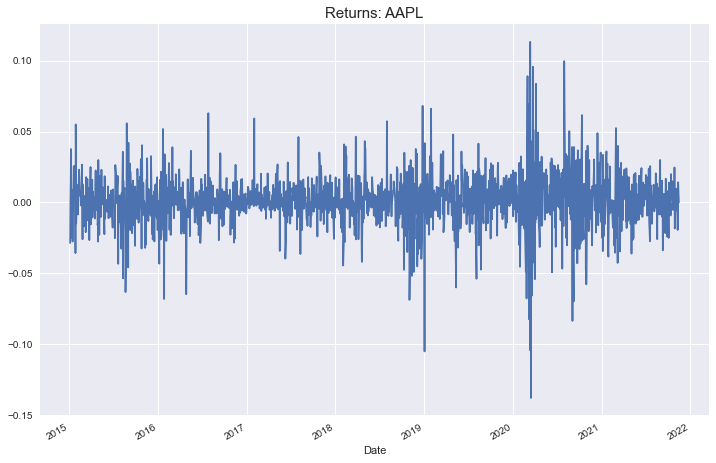

In [108]:
stock.plot_returns()

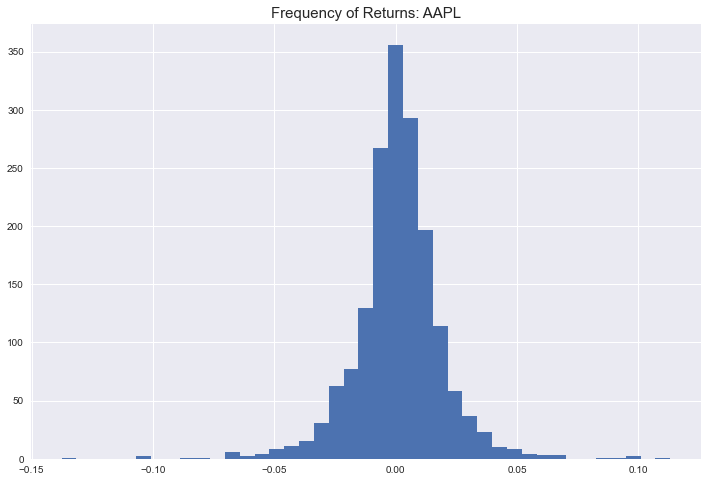

In [109]:
stock.plot_returns(kind="hist")

In [110]:
stock.set_ticker("BTC-USD")

[*********************100%***********************]  1 of 1 completed


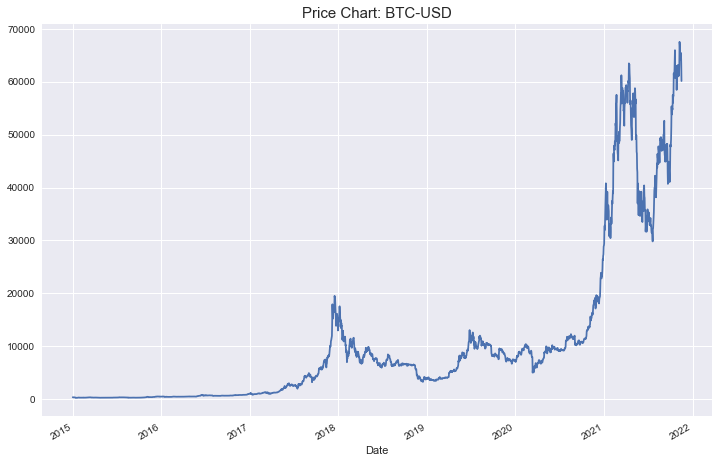

In [111]:
stock.plot_prices()

In [112]:
stock.std_returns()

0.0396217461522309

In [113]:
stock.annualized_perf()

Return: 0.528 | Risk: 0.629


In [114]:
stock

RiskReturn(ticker = BTC-USD, start = 2015-01-01, end = 2021-11-16)